<h1>Import libraries

you can install any missing libraries if necessary by removing '#' and running the `!pip install lzma pickle pandas os networkx matplotlib gdown` command

In [ ]:
#!pip install lzma pickle pandas os networkx matplotlib gdown

Import libraries

In [ ]:
# @title
import lzma
import pickle
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import gdown

<h1>Define the functions

In [ ]:
# @title
# This function reads dataframes and graphs from lzma files and assigns them to global variables
def read_dataframes_and_graphs(df_names, graph_names):
    # Loop over all dataframe names
    for df_name in df_names:
        # Open the lzma file in read-binary mode
        with lzma.open('/content/' + df_name + '.lzma', 'rb') as lzma_file:
            # Load the dataframe from the lzma file and assign it to a global variable
            globals()[df_name] = pd.read_pickle(lzma_file)
    # Loop over all graph names
    for graph_name in graph_names:
        # Open the lzma file in read-binary mode
        with lzma.open('/content/' + graph_name + '.lzma', 'rb') as lzma_file:
            # Load the graph from the lzma file and assign it to a global variable
            globals()[graph_name] = pickle.load(lzma_file)

# This function creates a graph from a dataframe
def create_graph(df, top_authors, top_nodes, sort_by):
    # Create a dataframe of the top authors according to the specified criterion
    top_authors_df = df.nlargest(top_authors, sort_by)
    # Create a directed graph from the dataframe
    G_top_authors = nx.from_pandas_edgelist(top_authors_df, 'author', 'parent_author', ['number_of_interactions', 'avg_sentiment'], create_using=nx.DiGraph())

    # Calculate the size of the nodes based on their degree in G_top_authors
    in_degrees = G_top_authors.in_degree()
    out_degrees = G_top_authors.out_degree()
    sizes = [100 * (in_degrees[n] - out_degrees[n]) + 300 for n in G_top_authors.nodes()]  # Add 300 to all sizes

    # Normalize the sizes of the nodes
    sizes = [50 + 550 * ((size - min(sizes)) / (max(sizes) - min(sizes))) for size in sizes]

    # Set the size of the figure
    plt.figure(figsize=(18, 12))

    # Draw the graph with weight
    pos = nx.spring_layout(G_top_authors, weight='interaction_sentiment_weighted', k=0.25)  # Use edge weights to determine node positions
    nx.draw_networkx_nodes(G_top_authors, pos, node_size=sizes)

    # Display as node labels, only the "top nodes" with the highest "variables"
    top_nodes_list = sorted(G_top_authors.nodes(), key=lambda n: G_top_authors.degree(n), reverse=True)[:top_nodes]
    labels = {node: node for node in top_nodes_list}
    nx.draw_networkx_labels(G_top_authors, pos, labels=labels)

    # Add edges with connection styles to show separate directions
    edge_widths = [d[sort_by] for (_, _, d) in G_top_authors.edges(data=True)]
    edge_widths = [0.1 + 0.9 * ((width - min(edge_widths)) / (max(edge_widths) - min(edge_widths))) for width in edge_widths]
    for (u, v, d), width in zip(G_top_authors.edges(data=True), edge_widths):
        nx.draw_networkx_edges(G_top_authors, pos, edgelist=[(u, v)], width=width, connectionstyle='arc3, rad = 0.1')

    # Show the plot
    plt.show()

# This function clears dataframes and graphs from memory
def clear_dataframes_and_graphs(df_names, graph_names):
    # Loop over all dataframe names
    for df_name in df_names:
        # If the dataframe exists in global variables, delete it
        if df_name in globals():
            del globals()[df_name]
    # Loop over all graph names
    for graph_name in graph_names:
        # If the graph exists in global variables, delete it
        if graph_name in globals():
            del globals()[graph_name]
    # Force garbage collection to free up memory
    gc.collect()



---


<h1>Import all the data into my Colab environment

All dataframes are lzma files saved to Google Drive, totaling around 13GB, downloading them all to the colab environment can take a bit of time.

In [ ]:
# @title
# Dictionary of links and file names
files = {    "https://drive.google.com/file/d/13XTbIwQENDBwYkYUiwU2cSS2km2SNy7G/view?usp=drive_link": "connections_2007.lzma",
    "https://drive.google.com/file/d/1_gIOqt_dDeXKhXT6ZkGaZL3gwjhMEx-F/view?usp=drive_link": "graph_2007.lzma",
    "https://drive.google.com/file/d/1SKdd_OznodPfzeRtEGRBH7g2ejkWFUTW/view?usp=drive_link": "groupby_connections_2007.lzma",
    "https://drive.google.com/file/d/1Y8WHyIvMsbuJPoH1X1saPR-u15h10r5I/view?usp=drive_link": "politics_comments_2007.lzma",
    "https://drive.google.com/file/d/1h7bnCff9lMr8aZGm5ptfIiXbJG3ogNgs/view?usp=drive_link": "politics_submissions_2007.lzma",
}

total_files = len(files)
downloaded_files = 0

for url, output in files.items():
    # Extract the file ID from the URL
    file_id = url.split('/')[5]
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # Download the file and save it with the specified name
    gdown.download(download_url, f'/content/{output}', quiet=False)

    # Update the count of downloaded files
    downloaded_files += 1

    # Print the progress bar
    print(f'Downloaded {downloaded_files} out of {total_files} files.')

Downloading...
From: https://drive.google.com/uc?id=13XTbIwQENDBwYkYUiwU2cSS2km2SNy7G
To: /content/connections_2007.lzma
100%|██████████| 1.36M/1.36M [00:00<00:00, 46.9MB/s]


Downloaded 1 out of 5 files.


Downloading...
From: https://drive.google.com/uc?id=1_gIOqt_dDeXKhXT6ZkGaZL3gwjhMEx-F
To: /content/graph_2007.lzma
100%|██████████| 1.06M/1.06M [00:00<00:00, 59.0MB/s]


Downloaded 2 out of 5 files.


Downloading...
From: https://drive.google.com/uc?id=1SKdd_OznodPfzeRtEGRBH7g2ejkWFUTW
To: /content/groupby_connections_2007.lzma
100%|██████████| 575k/575k [00:00<00:00, 65.7MB/s]


Downloaded 3 out of 5 files.


Downloading...
From: https://drive.google.com/uc?id=1Y8WHyIvMsbuJPoH1X1saPR-u15h10r5I
To: /content/politics_comments_2007.lzma
100%|██████████| 18.0M/18.0M [00:00<00:00, 61.6MB/s]


Downloaded 4 out of 5 files.


Downloading...
From: https://drive.google.com/uc?id=1h7bnCff9lMr8aZGm5ptfIiXbJG3ogNgs
To: /content/politics_submissions_2007.lzma
100%|██████████| 1.15M/1.15M [00:00<00:00, 37.2MB/s]

Downloaded 5 out of 5 files.


Full version with all dataframes, **not working**!

In [ ]:
# @title
# Dictionary of links and file names
files = {    "https://drive.google.com/file/d/1xAupqYHALnBMLgsdsE1N2F3aN1Bx0rPi/view?usp=drive_link": "politics_submissions_2022.lzma",
    "https://drive.google.com/file/d/13XTbIwQENDBwYkYUiwU2cSS2km2SNy7G/view?usp=drive_link": "connections_2007.lzma",
    "https://drive.google.com/file/d/1-NFHqnyD2z-xHGOFEOvdYe--6ZCgEHXY/view?usp=drive_link": "connections_2008.lzma",
    "https://drive.google.com/file/d/1zuWV1NoVI8T6PWPNWM19TKoIrCz4EDhk/view?usp=drive_link": "connections_2009.lzma",
    "https://drive.google.com/file/d/16vd484OeGdBcjPq5Z-PReCy01xc-GO5e/view?usp=drive_link": "connections_2010.lzma",
    "https://drive.google.com/file/d/1U7XApel89R0CqXDwVK0EEyvWezzjlNGh/view?usp=drive_link": "connections_2011.lzma",
    "https://drive.google.com/file/d/1uwiXw2O66irujGMmt66vqLZYuDkJr7bn/view?usp=drive_link": "connections_2012.lzma",
    "https://drive.google.com/file/d/1afa8XQoP-K_QtbrbmlmXWCvp5Oti2wtu/view?usp=drive_link": "connections_2013.lzma",
    "https://drive.google.com/file/d/1uqkNgtTSVhYQ00D-TjaydIfOgc76hgZ2/view?usp=drive_link": "connections_2014.lzma",
    "https://drive.google.com/file/d/1CCtbMtepR_7BJijpQDrXe3B0Pm89s4rS/view?usp=drive_link": "connections_2015.lzma",
    "https://drive.google.com/file/d/1duJB9CAw1gS0diDpaRhPdUOGQZ5Yra6b/view?usp=drive_link": "connections_2016.lzma",
    "https://drive.google.com/file/d/1BsRNYs9aUVDELkkk8_I6NkhubkA_WfEh/view?usp=drive_link": "connections_2017.lzma",
    "https://drive.google.com/file/d/1PKnqflPJFW4QQ0F4kToTIqfuBvwrd362/view?usp=drive_link": "connections_2018.lzma",
    "https://drive.google.com/file/d/1jHzoiFCedOOOzHqzBKjpGL2en9fwPdsg/view?usp=drive_link": "connections_2019.lzma",
    "https://drive.google.com/file/d/1xPzPjeR1NuwZ5shUgchuNCs0kuK9ZFqk/view?usp=drive_link": "connections_2020.lzma",
    "https://drive.google.com/file/d/1-0-IoSjNwulrjy-AOj5TIqCl-osGf3t7/view?usp=drive_link": "connections_2021.lzma",
    "https://drive.google.com/file/d/1mKufm0kYEg1g0-1yJ0vm4DhxTX_XaOHk/view?usp=drive_link": "connections_2022.lzma",
    "https://drive.google.com/file/d/1_gIOqt_dDeXKhXT6ZkGaZL3gwjhMEx-F/view?usp=drive_link": "graph_2007.lzma",
    "https://drive.google.com/file/d/1Tw4qgbZB-RUuaJqF7POahhd07NoxErSd/view?usp=drive_link": "graph_2008.lzma",
    "https://drive.google.com/file/d/1bh33e-zGjNcFBKU4vjT9wlYJ5FmxyAuj/view?usp=drive_link": "graph_2009.lzma",
    "https://drive.google.com/file/d/1pMkYMEF7QNPgxuz-51JZhaPHF7CH3XOJ/view?usp=drive_link": "graph_2010.lzma",
    "https://drive.google.com/file/d/1berOnnn38_2e-75C2_4fHmjJB1s9-6u6/view?usp=drive_link": "graph_2011.lzma",
    "https://drive.google.com/file/d/1kUudf5I1WNU8qOtRiwh8S4AHbTJ10wjW/view?usp=drive_link": "graph_2012.lzma",
    "https://drive.google.com/file/d/1Rw_Y-Fh9eJIrd7UlbA5VbmTQBT6xISOg/view?usp=drive_link": "graph_2013.lzma",
    "https://drive.google.com/file/d/1OT17hI8tbeg1RAAl2-Id2UsJSWoMqctB/view?usp=drive_link": "graph_2014.lzma",
    "https://drive.google.com/file/d/1r_oOknw_N33RdQVOsYDtjlQ_zu-p_Vpr/view?usp=drive_link": "graph_2015.lzma",
    "https://drive.google.com/file/d/1qx886RnM3ByygBJZ5JsZ_6g590yA8pX8/view?usp=drive_link": "graph_2016.lzma",
    "https://drive.google.com/file/d/1JLueodxdFOIPQP7GSY7xwzdn7Y--0NBQ/view?usp=drive_link": "graph_2017.lzma",
    "https://drive.google.com/file/d/1sIGXXf3cr3t82MeTEZE3SxGYLnHQ5vtI/view?usp=drive_link": "graph_2018.lzma",
    "https://drive.google.com/file/d/1RO6NJG77LJoTR7voBSd_36DfqO43FGcb/view?usp=drive_link": "graph_2019.lzma",
    "https://drive.google.com/file/d/1ak8sIcGy2or5lGE1YhE7XUG-yaQcpMUg/view?usp=drive_link": "graph_2020.lzma",
    "https://drive.google.com/file/d/1tDfEdkmEQ2kFfOpeIZggB71eOa4-CZ0b/view?usp=drive_link": "graph_2021.lzma",
    "https://drive.google.com/file/d/1rSa9LyNqD1_9dqB5pHWl1ApjReRkPi7W/view?usp=drive_link": "graph_2022.lzma",
    "https://drive.google.com/file/d/1SKdd_OznodPfzeRtEGRBH7g2ejkWFUTW/view?usp=drive_link": "groupby_connections_2007.lzma",
    "https://drive.google.com/file/d/1US15Wf8qs9pRgSPWejSOMt1kSIGKRO6M/view?usp=drive_link": "groupby_connections_2008.lzma",
    "https://drive.google.com/file/d/1I7kBhu2DJr4L-WYalO3k8P85AIP62PYw/view?usp=drive_link": "groupby_connections_2009.lzma",
    "https://drive.google.com/file/d/1aYWiBaqnpXnmy6Fv1e2yihhtvTtpi8jx/view?usp=drive_link": "groupby_connections_2010.lzma",
    "https://drive.google.com/file/d/1BJfqGO6T7ldoR_mp5BVqR7tJ5alO0p3w/view?usp=drive_link": "groupby_connections_2011.lzma",
    "https://drive.google.com/file/d/1tJ32iV4zsCEavhtWGlmEiFCUwtnlfQvQ/view?usp=drive_link": "groupby_connections_2012.lzma",
    "https://drive.google.com/file/d/1Ky32ZAYGFHLzHOWk8YicqQLM2tbv-mfW/view?usp=drive_link": "groupby_connections_2013.lzma",
    "https://drive.google.com/file/d/1xkC1KtPERuOWnfjKMYXFb8q27pYgvwzH/view?usp=drive_link": "groupby_connections_2014.lzma",
    "https://drive.google.com/file/d/1Y1noOBf2IkwChhzvo8pTr8_HnXqjAMp1/view?usp=drive_link": "groupby_connections_2015.lzma",
    "https://drive.google.com/file/d/1iWhh-UKZ9Ild6XvMiUbmUf4B78BMsina/view?usp=drive_link": "groupby_connections_2016.lzma",
    "https://drive.google.com/file/d/1q6zLq9UgB1B9Su4lt-s-QMv38zb_1oK7/view?usp=drive_link": "groupby_connections_2017.lzma",
    "https://drive.google.com/file/d/11s0E2R61Qs2wOIB1Sw9CNRrQQoVYhaan/view?usp=drive_link": "groupby_connections_2018.lzma",
    "https://drive.google.com/file/d/14xEGsv6ynnbtnuodL253QJLjT2eoZKKd/view?usp=drive_link": "groupby_connections_2019.lzma",
    "https://drive.google.com/file/d/1YWZTYFyCDJZ24YaG8onDCmJbSxrzDSbB/view?usp=drive_link": "groupby_connections_2020.lzma",
    "https://drive.google.com/file/d/1cMrdrtAxPPONsQaLALMyhLjBlnOOPs8K/view?usp=drive_link": "groupby_connections_2021.lzma",
    "https://drive.google.com/file/d/1aVZRGq54xWdNb109nl9GU9rlnfmtQaW-/view?usp=drive_link": "groupby_connections_2022.lzma",
    "https://drive.google.com/file/d/1Y8WHyIvMsbuJPoH1X1saPR-u15h10r5I/view?usp=drive_link": "politics_comments_2007.lzma",
    "https://drive.google.com/file/d/1gNVKOZdkmyCfw4tZVW0p-R_SgRoIC_yi/view?usp=drive_link": "politics_comments_2008.lzma",
    "https://drive.google.com/file/d/1Ttw8hsoTPiQuuazrqhrdIpRiMbB7301c/view?usp=drive_link": "politics_comments_2009.lzma",
    "https://drive.google.com/file/d/19pmQruTglYRe10w-o8gt_8U5eWwHMrXQ/view?usp=drive_link": "politics_comments_2010.lzma",
    "https://drive.google.com/file/d/1UkYY12O3J-wtL6ryhvZ5GR71FimLejsi/view?usp=drive_link": "politics_comments_2011.lzma",
    "https://drive.google.com/file/d/1leWSwAWBM7XQiL6FVHUHCQc7dWaUBDeO/view?usp=drive_link": "politics_comments_2012.lzma",
    "https://drive.google.com/file/d/1rFz8rWsrG2N2zZSUUpGNFfo-y_kgL_bh/view?usp=drive_link": "politics_comments_2013.lzma",
    "https://drive.google.com/file/d/1l0J6IxxATVNcYtODilLyZJwvxDmZdhJ2/view?usp=drive_link": "politics_comments_2014.lzma",
    "https://drive.google.com/file/d/10QiWuUZSQb585koUFxWQusKXmDHi1qi1/view?usp=drive_link": "politics_comments_2015.lzma",
    "https://drive.google.com/file/d/17rHaqc59nuf17RqPaA4qMtkaMm8ZLGxp/view?usp=drive_link": "politics_comments_2016.lzma",
    "https://drive.google.com/file/d/1-FW_yTirJOyE7XiqjY9-VHTQIcfwMYcJ/view?usp=drive_link": "politics_comments_2017.lzma",
    "https://drive.google.com/file/d/12PTiNAn9xmjXbyuWBsZTUFZCA8DxFxBR/view?usp=drive_link": "politics_comments_2018.lzma",
    "https://drive.google.com/file/d/1jc-sA7ERreDM7G7dSTjP9yBopQ2aetcm/view?usp=drive_link": "politics_comments_2019.lzma",
    "https://drive.google.com/file/d/1OLmdYanCH7VVMQyTHYfnyg-Kdu_PiEZh/view?usp=drive_link": "politics_comments_2020.lzma",
    "https://drive.google.com/file/d/1kbLPg4opGQTYAmhdTWEITCB2SUtY2OGT/view?usp=drive_link": "politics_comments_2021.lzma",
    "https://drive.google.com/file/d/1eIVqXPgeu3qKRJVUqPxC1xjrIVBNaOPV/view?usp=drive_link": "politics_comments_2022.lzma",
    "https://drive.google.com/file/d/1h7bnCff9lMr8aZGm5ptfIiXbJG3ogNgs/view?usp=drive_link": "politics_submissions_2007.lzma",
    "https://drive.google.com/file/d/12ZO3KejJfRcbGXKg8bZt1aEZ23EPdgF1/view?usp=drive_link": "politics_submissions_2008.lzma",
    "https://drive.google.com/file/d/1EJc86luhUBpUiVqQsO0XISPp-Sxb6_6Q/view?usp=drive_link": "politics_submissions_2009.lzma",
    "https://drive.google.com/file/d/11QiLH60UDliQ5OYMa9DDswRLQOOnMnp8/view?usp=drive_link": "politics_submissions_2010.lzma",
    "https://drive.google.com/file/d/16uSVrq04NaDmYa0xwecD59R7kz3Qd-IO/view?usp=drive_link": "politics_submissions_2011.lzma",
    "https://drive.google.com/file/d/15ZDxmBLFY5djNkwoIkxasdHUeMfsntud/view?usp=drive_link": "politics_submissions_2012.lzma",
    "https://drive.google.com/file/d/198VAOtIiDELOc04H-VkaUaUmVeClUXuv/view?usp=drive_link": "politics_submissions_2013.lzma",
    "https://drive.google.com/file/d/1NQImFvUL9Hnwa4Pf0nm725NgZjetDYs2/view?usp=drive_link": "politics_submissions_2014.lzma",
    "https://drive.google.com/file/d/1qgK028NWKDD6mSu14j8qdFiocFfWBZSE/view?usp=drive_link": "politics_submissions_2015.lzma",
    "https://drive.google.com/file/d/1vB2Uqbktwd1e6l39T7ipku9rCQJBjnki/view?usp=drive_link": "politics_submissions_2016.lzma",
    "https://drive.google.com/file/d/16R4FfoOApAhsdHqb2EmCpQbL8WzjlIZ_/view?usp=drive_link": "politics_submissions_2017.lzma",
    "https://drive.google.com/file/d/18IiXIr46ixYIZ9M9ZO3rvk4WzxtjuJJ1/view?usp=drive_link": "politics_submissions_2018.lzma",
    "https://drive.google.com/file/d/17OOhTbzPlqDlTMz6H_3doScRxL81iBTk/view?usp=drive_link": "politics_submissions_2019.lzma",
    "https://drive.google.com/file/d/1woYvmPf82-K7b47JzwzsGp5ez6yzQ54n/view?usp=drive_link": "politics_submissions_2020.lzma",
    "https://drive.google.com/file/d/1_IlNWz9x2JT6ljPsVg0QtdME65kfGOyL/view?usp=drive_link": "politics_submissions_2021.lzma",
}

total_files = len(files)
downloaded_files = 0

for url, output in files.items():
    # Extract the file ID from the URL
    file_id = url.split('/')[5]
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # Download the file and save it with the specified name
    gdown.download(download_url, f'/content/{output}', quiet=False)

    # Update the count of downloaded files
    downloaded_files += 1

    # Print the progress bar
    print(f'Downloaded {downloaded_files} out of {total_files} files.')

Downloading...
From: https://drive.google.com/uc?id=1xAupqYHALnBMLgsdsE1N2F3aN1Bx0rPi
To: /content/politics_submissions_2022.lzma
100%|██████████| 4.05M/4.05M [00:00<00:00, 28.4MB/s]


Downloaded 1 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=13XTbIwQENDBwYkYUiwU2cSS2km2SNy7G
To: /content/connections_2007.lzma
100%|██████████| 1.36M/1.36M [00:00<00:00, 34.5MB/s]


Downloaded 2 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1-NFHqnyD2z-xHGOFEOvdYe--6ZCgEHXY
To: /content/connections_2008.lzma
100%|██████████| 5.15M/5.15M [00:00<00:00, 24.4MB/s]


Downloaded 3 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1zuWV1NoVI8T6PWPNWM19TKoIrCz4EDhk
To: /content/connections_2009.lzma
100%|██████████| 6.47M/6.47M [00:00<00:00, 18.3MB/s]


Downloaded 4 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=16vd484OeGdBcjPq5Z-PReCy01xc-GO5e
To: /content/connections_2010.lzma
100%|██████████| 13.3M/13.3M [00:00<00:00, 35.0MB/s]


Downloaded 5 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1U7XApel89R0CqXDwVK0EEyvWezzjlNGh
To: /content/connections_2011.lzma
100%|██████████| 25.2M/25.2M [00:01<00:00, 22.2MB/s]


Downloaded 6 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1uwiXw2O66irujGMmt66vqLZYuDkJr7bn
To: /content/connections_2012.lzma
100%|██████████| 42.1M/42.1M [00:01<00:00, 27.6MB/s]


Downloaded 7 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1afa8XQoP-K_QtbrbmlmXWCvp5Oti2wtu
To: /content/connections_2013.lzma
100%|██████████| 34.9M/34.9M [00:00<00:00, 38.5MB/s]


Downloaded 8 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1uqkNgtTSVhYQ00D-TjaydIfOgc76hgZ2
To: /content/connections_2014.lzma
100%|██████████| 22.3M/22.3M [00:00<00:00, 40.9MB/s]


Downloaded 9 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1CCtbMtepR_7BJijpQDrXe3B0Pm89s4rS
To: /content/connections_2015.lzma
100%|██████████| 38.1M/38.1M [00:01<00:00, 31.0MB/s]


Downloaded 10 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1duJB9CAw1gS0diDpaRhPdUOGQZ5Yra6b
To: /content/connections_2016.lzma
100%|██████████| 167M/167M [00:04<00:00, 38.3MB/s]


Downloaded 11 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1BsRNYs9aUVDELkkk8_I6NkhubkA_WfEh
To: /content/connections_2017.lzma
100%|██████████| 185M/185M [00:05<00:00, 32.9MB/s]


Downloaded 12 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1PKnqflPJFW4QQ0F4kToTIqfuBvwrd362
To: /content/connections_2018.lzma
100%|██████████| 205M/205M [00:05<00:00, 35.4MB/s]


Downloaded 13 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1jHzoiFCedOOOzHqzBKjpGL2en9fwPdsg
To: /content/connections_2019.lzma
100%|██████████| 207M/207M [00:05<00:00, 36.0MB/s]


Downloaded 14 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1xPzPjeR1NuwZ5shUgchuNCs0kuK9ZFqk
To: /content/connections_2020.lzma
100%|██████████| 272M/272M [00:06<00:00, 42.3MB/s]


Downloaded 15 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1-0-IoSjNwulrjy-AOj5TIqCl-osGf3t7
To: /content/connections_2021.lzma
100%|██████████| 146M/146M [00:04<00:00, 34.7MB/s]


Downloaded 16 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1mKufm0kYEg1g0-1yJ0vm4DhxTX_XaOHk
To: /content/connections_2022.lzma
100%|██████████| 111M/111M [00:03<00:00, 34.7MB/s]


Downloaded 17 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1_gIOqt_dDeXKhXT6ZkGaZL3gwjhMEx-F
To: /content/graph_2007.lzma
100%|██████████| 1.06M/1.06M [00:00<00:00, 105MB/s]


Downloaded 18 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1Tw4qgbZB-RUuaJqF7POahhd07NoxErSd
To: /content/graph_2008.lzma
100%|██████████| 4.14M/4.14M [00:00<00:00, 169MB/s]


Downloaded 19 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1bh33e-zGjNcFBKU4vjT9wlYJ5FmxyAuj
To: /content/graph_2009.lzma
100%|██████████| 5.17M/5.17M [00:00<00:00, 19.5MB/s]


Downloaded 20 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1pMkYMEF7QNPgxuz-51JZhaPHF7CH3XOJ
To: /content/graph_2010.lzma
100%|██████████| 10.2M/10.2M [00:00<00:00, 30.1MB/s]


Downloaded 21 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1berOnnn38_2e-75C2_4fHmjJB1s9-6u6
To: /content/graph_2011.lzma
100%|██████████| 20.1M/20.1M [00:01<00:00, 13.1MB/s]


Downloaded 22 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1kUudf5I1WNU8qOtRiwh8S4AHbTJ10wjW
To: /content/graph_2012.lzma
100%|██████████| 33.2M/33.2M [00:01<00:00, 29.2MB/s]


Downloaded 23 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1Rw_Y-Fh9eJIrd7UlbA5VbmTQBT6xISOg
To: /content/graph_2013.lzma
100%|██████████| 26.0M/26.0M [00:00<00:00, 38.9MB/s]


Downloaded 24 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1OT17hI8tbeg1RAAl2-Id2UsJSWoMqctB
To: /content/graph_2014.lzma
100%|██████████| 16.2M/16.2M [00:00<00:00, 28.9MB/s]


Downloaded 25 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1r_oOknw_N33RdQVOsYDtjlQ_zu-p_Vpr
To: /content/graph_2015.lzma
100%|██████████| 27.8M/27.8M [00:00<00:00, 42.1MB/s]


Downloaded 26 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1qx886RnM3ByygBJZ5JsZ_6g590yA8pX8
To: /content/graph_2016.lzma
100%|██████████| 120M/120M [00:03<00:00, 35.3MB/s]


Downloaded 27 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1JLueodxdFOIPQP7GSY7xwzdn7Y--0NBQ
To: /content/graph_2017.lzma
100%|██████████| 137M/137M [00:02<00:00, 49.2MB/s]


Downloaded 28 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1sIGXXf3cr3t82MeTEZE3SxGYLnHQ5vtI
To: /content/graph_2018.lzma
100%|██████████| 153M/153M [00:02<00:00, 57.6MB/s]


Downloaded 29 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1RO6NJG77LJoTR7voBSd_36DfqO43FGcb
To: /content/graph_2019.lzma
100%|██████████| 152M/152M [00:04<00:00, 35.8MB/s]


Downloaded 30 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1ak8sIcGy2or5lGE1YhE7XUG-yaQcpMUg
To: /content/graph_2020.lzma
100%|██████████| 211M/211M [00:04<00:00, 43.6MB/s]


Downloaded 31 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1tDfEdkmEQ2kFfOpeIZggB71eOa4-CZ0b
To: /content/graph_2021.lzma
100%|██████████| 113M/113M [00:04<00:00, 22.8MB/s]


Downloaded 32 out of 80 files.


Downloading...
From: https://drive.google.com/uc?id=1rSa9LyNqD1_9dqB5pHWl1ApjReRkPi7W
To: /content/graph_2022.lzma
100%|██████████| 87.4M/87.4M [00:01<00:00, 57.7MB/s]


Downloaded 33 out of 80 files.
Access denied with the following error:
Downloaded 34 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1SKdd_OznodPfzeRtEGRBH7g2ejkWFUTW 



Access denied with the following error:
Downloaded 35 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1US15Wf8qs9pRgSPWejSOMt1kSIGKRO6M 



Access denied with the following error:
Downloaded 36 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1I7kBhu2DJr4L-WYalO3k8P85AIP62PYw 



Access denied with the following error:
Downloaded 37 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1aYWiBaqnpXnmy6Fv1e2yihhtvTtpi8jx 



Access denied with the following error:
Downloaded 38 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1BJfqGO6T7ldoR_mp5BVqR7tJ5alO0p3w 



Access denied with the following error:
Downloaded 39 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1tJ32iV4zsCEavhtWGlmEiFCUwtnlfQvQ 



Access denied with the following error:
Downloaded 40 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1Ky32ZAYGFHLzHOWk8YicqQLM2tbv-mfW 



Access denied with the following error:
Downloaded 41 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1xkC1KtPERuOWnfjKMYXFb8q27pYgvwzH 



Access denied with the following error:
Downloaded 42 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1Y1noOBf2IkwChhzvo8pTr8_HnXqjAMp1 



Access denied with the following error:
Downloaded 43 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1iWhh-UKZ9Ild6XvMiUbmUf4B78BMsina 



Access denied with the following error:
Downloaded 44 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1q6zLq9UgB1B9Su4lt-s-QMv38zb_1oK7 



Access denied with the following error:
Downloaded 45 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=11s0E2R61Qs2wOIB1Sw9CNRrQQoVYhaan 



Access denied with the following error:
Downloaded 46 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=14xEGsv6ynnbtnuodL253QJLjT2eoZKKd 



Access denied with the following error:
Downloaded 47 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1YWZTYFyCDJZ24YaG8onDCmJbSxrzDSbB 



Access denied with the following error:
Downloaded 48 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1cMrdrtAxPPONsQaLALMyhLjBlnOOPs8K 



Access denied with the following error:
Downloaded 49 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1aVZRGq54xWdNb109nl9GU9rlnfmtQaW- 



Access denied with the following error:
Downloaded 50 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1Y8WHyIvMsbuJPoH1X1saPR-u15h10r5I 



Access denied with the following error:
Downloaded 51 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1gNVKOZdkmyCfw4tZVW0p-R_SgRoIC_yi 



Access denied with the following error:
Downloaded 52 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1Ttw8hsoTPiQuuazrqhrdIpRiMbB7301c 



Access denied with the following error:
Downloaded 53 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=19pmQruTglYRe10w-o8gt_8U5eWwHMrXQ 



Access denied with the following error:
Downloaded 54 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1UkYY12O3J-wtL6ryhvZ5GR71FimLejsi 



Access denied with the following error:
Downloaded 55 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1leWSwAWBM7XQiL6FVHUHCQc7dWaUBDeO 



Access denied with the following error:
Downloaded 56 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1rFz8rWsrG2N2zZSUUpGNFfo-y_kgL_bh 



Access denied with the following error:
Downloaded 57 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1l0J6IxxATVNcYtODilLyZJwvxDmZdhJ2 



Access denied with the following error:
Downloaded 58 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=10QiWuUZSQb585koUFxWQusKXmDHi1qi1 



Access denied with the following error:
Downloaded 59 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=17rHaqc59nuf17RqPaA4qMtkaMm8ZLGxp 



Access denied with the following error:
Downloaded 60 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1-FW_yTirJOyE7XiqjY9-VHTQIcfwMYcJ 



Access denied with the following error:
Downloaded 61 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=12PTiNAn9xmjXbyuWBsZTUFZCA8DxFxBR 



Access denied with the following error:
Downloaded 62 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1jc-sA7ERreDM7G7dSTjP9yBopQ2aetcm 



Access denied with the following error:
Downloaded 63 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1OLmdYanCH7VVMQyTHYfnyg-Kdu_PiEZh 



Access denied with the following error:
Downloaded 64 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1kbLPg4opGQTYAmhdTWEITCB2SUtY2OGT 



Access denied with the following error:
Downloaded 65 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1eIVqXPgeu3qKRJVUqPxC1xjrIVBNaOPV 



Access denied with the following error:
Downloaded 66 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1h7bnCff9lMr8aZGm5ptfIiXbJG3ogNgs 



Access denied with the following error:
Downloaded 67 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=12ZO3KejJfRcbGXKg8bZt1aEZ23EPdgF1 



Access denied with the following error:
Downloaded 68 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1EJc86luhUBpUiVqQsO0XISPp-Sxb6_6Q 



Access denied with the following error:
Downloaded 69 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=11QiLH60UDliQ5OYMa9DDswRLQOOnMnp8 



Access denied with the following error:
Downloaded 70 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=16uSVrq04NaDmYa0xwecD59R7kz3Qd-IO 



Access denied with the following error:
Downloaded 71 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=15ZDxmBLFY5djNkwoIkxasdHUeMfsntud 



Access denied with the following error:
Downloaded 72 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=198VAOtIiDELOc04H-VkaUaUmVeClUXuv 



Access denied with the following error:
Downloaded 73 out of 80 files.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1NQImFvUL9Hnwa4Pf0nm725NgZjetDYs2 



KeyboardInterrupt: 



---


<h1>Names of the dataframes and graphs you want to work with </h1>

For each year from 2007 to 2022, there are 4 Dataframes and 1 complete Graph.
The dataframes are:
*   `politics_submissions_YYYY`
*   `politics_comments_YYYY`
*   `connections_YYYY`
*   `groupby_connections_YYYY`

While the graphs are:
*   `graph_YYYY`

In [ ]:
df_names = ["politics_submissions_2007", "politics_comments_2007","connections_2007", "groupby_connections_2007"]
graph_names = ["graph_2007"]



---


<h1>Read dataframes and graphs


In [ ]:
read_dataframes_and_graphs(df_names, graph_names)



---


<h1>Clear dataframes and graphs</h1>

Dataframes and graphs may be too large to process all at once, so it is possible to decompress and work with only a few dataframes at a time, and then delete them to free up RAM.

In [ ]:
clear_dataframes_and_graphs(df_names, graph_names)



---


<h1>Some examples

let's examine the 2007 data as an example of how they are structured



---
<h3>politics_submissions:</h3>

`politics_submissions` contains all comments from the r/politics subreddit from that year.

The columns are:
*   `author`: is the nickname of the post author
*   `created_utc`: is the timestamp of when that post was created and posted
*   `id`: is the post id
*   `num_comments`: it is the number of comments the post received
*   `title score`: it is the title of the post
*   `author_fullname`: Often this value is NaN, when present it is the full_name  id of the author, it is structured as "t2_"+ ID
*   `ups`: Often this value is NaN, when it is present it is the number of upvotes of the post.

In [ ]:
politics_submissions_2007

,author,created_utc,id,num_comments,title,score,author_fullname,ups
0,db2,2007-08-06 05:30:51,2cnih,0,Republican hopefuls wade into terrorist strike...,0,NaN,NaN
1,goldfish1man,2007-08-06 05:33:52,2cnj0,0,Poem From Guantanamo,0,NaN,NaN
2,Xiphorian,2007-08-06 05:50:08,2cnnc,10,"Smashing interview by Ron Paul on FOX! ""Just ...",66,NaN,NaN
3,bakosdelowang,2007-08-06 06:05:51,2cnqd,0,House approves $460B Pentagon budget... better...,5,NaN,NaN
4,rayhoffman,2007-08-06 06:17:19,2cnsc,0,Ron Paul Smear Job,0,NaN,NaN
...,...,...,...,...,...,...,...,...
42471,Kimura,2007-12-30 21:58:11,64681,0,Athens: The Truth about Democracy (This fascin...,5,NaN,NaN
42473,redditnews,2007-12-30 22:08:23,6468m,0,Khaleej Times Online - Machiavellian Musharraf,1,NaN,NaN
42474,emeraldcity,2007-12-30 22:10:56,6468r,0,"Badass Dir. Oliver Stone to Negotiate w/ ""Terr...",2,NaN,NaN
42477,auggie,2007-12-30 22:33:05,646a9,14,"Ronald Reagan - Nominee, 2007 GOP Adultery Hal...",1,NaN,NaN




---
<h3>politics_comments:</h3>

`politics_comments` contains all comments from the r/politics subreddit from that year.
The columns are:

*   `author`: is the nickname of the comment author
*   `body`: it is the text of the comment
*   `date`: these are the timestamps of when the comment was published
*   `parent_id:` it is the fullname id of the "parent" to which the comment is replying, it is composed of "t1_" if the parent is a comment or "t3_" if the parent is another comment, + ID.
*   `id`: is the comment id
*   `score`: upvote - downvote
*   `author_fullname`: Often this value is NaN, when present it is the full_name id of the author, it is structured as "t2_"+ ID
*   `ups`: number of upvotes, in older datasets score is equal to ups, because ups and down are no longer public, and the score is calculated with down = 0

In [ ]:
politics_comments_2007

,author,body,date,parent_id,id,score,author_fullname,ups
0,lojomofo,"DAMN, she's a fox! Also I love his retort to t...",2007-08-06 06:05:18,t3_2cnnc,c2cnq9,6,NaN,6
2,shadowsurge,"Personally I'd prefer both, its just that I ha...",2007-08-06 06:37:40,t3_2cnti,c2cnwe,12,NaN,12
3,wats8976,What no?,2007-08-06 06:44:32,t3_2cnvc,c2cnxw,-1,NaN,-1
4,cl3ft,"well thought out argument there, nigh on irref...",2007-08-06 06:49:07,t3_2cnvc,c2cnyl,4,NaN,4
6,uriel,"My plan is to let it burn, and then pee on the...",2007-08-06 07:09:02,t1_c2cnwe,c2co1r,10,NaN,10
...,...,...,...,...,...,...,...,...
309121,LiberalDemocrat,"COOL BRO, I HATE BAD BLOOD\r\n\r\nIM GONNA ADD...",2007-12-30 22:54:53,t1_c02s15k,c02s15s,1,NaN,1
309124,OneAndOnlySnob,"First, I really have no idea what you mean her...",2007-12-30 22:56:27,t1_c02s0lc,c02s161,1,NaN,1
309126,eadmund,The problem is that the absurd is not preventi...,2007-12-30 22:57:39,t1_c02s12o,c02s16a,2,NaN,2
309127,LiberalDemocrat,I DONT THINK THERE IS A STONG CLAN PRESENCE IN...,2007-12-30 22:57:50,t3_645rf,c02s16d,3,NaN,3




---
<h3>connections:</h3>

`connections` contains the connections of each comment with its parent.
The columns are:
*   `author`: nickname of the comment author
*   `id`: id of the comment
*   `parent_id`: id of the parent (comment or post)
*   `sentiment`: Overall sentiment value of the comment text, between -1 and 1.
*   `parent_author`: nickname of the parent author (comment or post)

In [ ]:
connections_2007

,author,id,parent_id,sentiment,parent_author
0,lojomofo,c2cnq9,2cnnc,0.2638,Xiphorian
2,shadowsurge,c2cnwe,2cnti,-0.6597,abudabu
6,uriel,c2co1r,c2cnwe,-0.6310,shadowsurge
8,rgladstein,c2co7o,2co4t,0.0000,qgyh2
9,Gorgias,c2co9o,2co7f,0.5070,bobcat
...,...,...,...,...,...
309121,LiberalDemocrat,c02s15s,c02s15k,-0.6808,cipherprime
309124,OneAndOnlySnob,c02s161,c02s0lc,-0.6985,aletoledo
309126,eadmund,c02s16a,c02s12o,0.2240,randomb0y
309127,LiberalDemocrat,c02s16d,645rf,0.0129,Flemlord




---
<h3>groupby_connections:</h3>

`groupby_connections` contains the connections of each comment with its parent grouped by author, the purpose is to represent the link between all comment authors.
The columns are:
*   `author`: nickname of the comment author (sender)
*   `parent_author`: nickname of the parent's author (recipient)
*   `number_of_interactions`: number of comments that sender sent to that recipient
*   `avg_sentiment`: Average sentiment of comments
*   `interaction_sentiment_weighted`: number_of_interactions*avg_sentiment

In [ ]:
groupby_connections_2007

,author,parent_author,number_of_interactions,avg_sentiment,interaction_sentiment_weighted
0,--GOD--,justinpgardner,1,-0.77830,-0.7783
1,--GOD--,r3dd173r,1,0.72660,0.7266
2,--GOD--,rocky_m,1,-0.17790,-0.1779
3,-J-,27182818284,1,0.00000,0.0000
4,-J-,54gy6dm,2,-0.45365,-0.9073
...,...,...,...,...,...
113185,zzz1357,smatty1,1,-0.31820,-0.3182
113186,zzzeek,Flemlord,1,-0.72690,-0.7269
113187,zzzeek,MarlonBain,1,0.46960,0.4696
113188,zzzeek,bebnet,1,-0.59990,-0.5999


---
<h1>Graphs:</h1>

The complete graphs can be recalled with `graph`, they are directed graphs and are built from the groupby_connections datasets, author and parent author constitute the nodes, while the edges represent the messages that one has sent to the other, each graph uses two sets of weights that can be called independently during processing: `number_of_interactions` and `avg_sentiment`

In [ ]:
#example: number_of_nodes
graph_2007.number_of_nodes()

11078

In [ ]:

#example: number_of_edges
graph_2007.number_of_edges()

113190

---
<h3>View the graph</h3>

the complete graph may be too complex to display all of it, however it is possible to display a sub-graph with the top n authors sorted by `number_of_interactions`, `avg_sentiment` or `nteraction_sentiment_weighted`, via the `create_graph` function which will take the first n rows of the `groupby_connections` dataframe, sorted in order decreasing based on one of the three specified criteria, and will create and display the corresponding graph, furthermore it is possible to specify how many of the largest nodes to display the name of.

The dimensions of the nodes depend on their degree, the incoming arcs "inflate" the node, and the outgoing ones "deflate" it, the thickness of the arcs depends on the variable chosen for the sorting, with the thickest node for the thickest value high, the position of the nodes is influenced by `interaction_sentiment_weighted` and a manually chosen parameter "`k`", which increases the repulsion of the nodes so as to avoid overlaps.


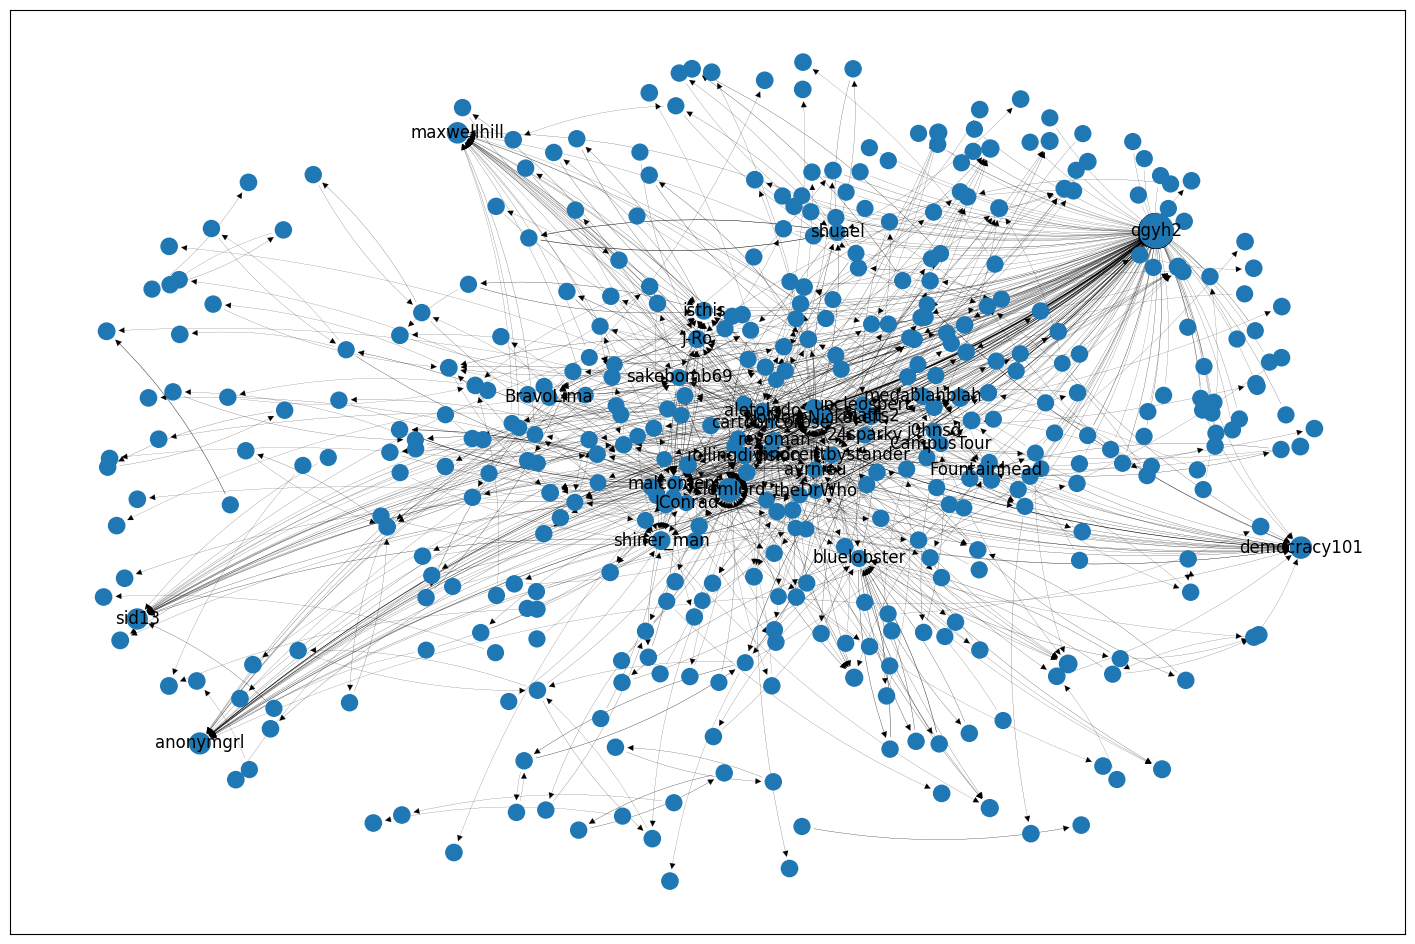

In [ ]:
top_authors = 1000  # Number of "top authors"
top_nodes = 30  # Number of "top nodes" for labels
sort_by = 'number_of_interactions'  # Criterion for sorting comments

create_graph(groupby_connections_2007, top_authors, top_nodes, sort_by)
